# US_Accidents_Exploratory_Data_Analysis

### AIM: To predict the severity of accidents based on various factors.

In [1]:
from sklearn.metrics import classification_report, confusion_matrix
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import recall_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pickle

2023-03-22 14:07:49.522781: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-22 14:07:49.522936: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-22 14:07:49.522954: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


In [2]:
df= pd.read_csv("dataset.csv")

In [3]:
df.head()

ID  Severity           Start_Time             End_Time  Start_Lat  \
0  A-1         3  2016-02-08 00:37:08  2016-02-08 06:37:08  40.108910   
1  A-2         2  2016-02-08 05:56:20  2016-02-08 11:56:20  39.865420   
2  A-3         2  2016-02-08 06:15:39  2016-02-08 12:15:39  39.102660   
3  A-4         2  2016-02-08 06:51:45  2016-02-08 12:51:45  41.062130   
4  A-5         3  2016-02-08 07:53:43  2016-02-08 13:53:43  39.172393   

   Start_Lng    End_Lat    End_Lng  Distance(mi)  \
0 -83.092860  40.112060 -83.031870         3.230   
1 -84.062800  39.865010 -84.048730         0.747   
2 -84.524680  39.102090 -84.523960         0.055   
3 -81.537840  41.062170 -81.535470         0.123   
4 -84.492792  39.170476 -84.501798         0.500   

                                         Description  ...  Roundabout Station  \
0  Between Sawmill Rd/Exit 20 and OH-315/Olentang...  ...       False   False   
1                 At OH-4/OH-235/Exit 41 - Accident.  ...       False   False   
2                   At I-71/US-50/Exit 1 - Accident.  ...       False   False   
3                    At Dart Ave/Exit 21 - Accident.  ...       False   False   
4                 At Mitchell Ave/Exit 6 - Accident.  ...       False   False   

    Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0  False           False          False        False          Night   
1  False           False          False        False          Night   
2  False           False          False        False          Night   
3  False           False          False        False          Night   
4  False           False          False        False            Day   

  Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0          Night             Night                 Night  
1          Night             Night                 Night  
2          Night             Night                   Day  
3          Night               Day                   Day  
4            Day               Day                   Day  

[5 rows x 47 columns]

In [4]:
df.shape

(2845342, 47)

In [5]:
len(df.columns)

47

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [7]:
df.describe()

Severity     Start_Lat     Start_Lng       End_Lat       End_Lng  \
count  2.845342e+06  2.845342e+06  2.845342e+06  2.845342e+06  2.845342e+06   
mean   2.137572e+00  3.624520e+01 -9.711463e+01  3.624532e+01 -9.711439e+01   
std    4.787216e-01  5.363797e+00  1.831782e+01  5.363873e+00  1.831763e+01   
min    1.000000e+00  2.456603e+01 -1.245481e+02  2.456601e+01 -1.245457e+02   
25%    2.000000e+00  3.344517e+01 -1.180331e+02  3.344628e+01 -1.180333e+02   
50%    2.000000e+00  3.609861e+01 -9.241808e+01  3.609799e+01 -9.241772e+01   
75%    2.000000e+00  4.016024e+01 -8.037243e+01  4.016105e+01 -8.037338e+01   
max    4.000000e+00  4.900058e+01 -6.711317e+01  4.907500e+01 -6.710924e+01   

       Distance(mi)        Number  Temperature(F)  Wind_Chill(F)  \
count  2.845342e+06  1.101431e+06    2.776068e+06   2.375699e+06   
mean   7.026779e-01  8.089408e+03    6.179356e+01   5.965823e+01   
std    1.560361e+00  1.836009e+04    1.862263e+01   2.116097e+01   
min    0.000000e+00  0.000000e+00   -8.900000e+01  -8.900000e+01   
25%    5.200000e-02  1.270000e+03    5.000000e+01   4.600000e+01   
50%    2.440000e-01  4.007000e+03    6.400000e+01   6.300000e+01   
75%    7.640000e-01  9.567000e+03    7.600000e+01   7.600000e+01   
max    1.551860e+02  9.999997e+06    1.960000e+02   1.960000e+02   

        Humidity(%)  Pressure(in)  Visibility(mi)  Wind_Speed(mph)  \
count  2.772250e+06  2.786142e+06    2.774796e+06     2.687398e+06   
mean   6.436545e+01  2.947234e+01    9.099391e+00     7.395044e+00   
std    2.287457e+01  1.045286e+00    2.717546e+00     5.527454e+00   
min    1.000000e+00  0.000000e+00    0.000000e+00     0.000000e+00   
25%    4.800000e+01  2.931000e+01    1.000000e+01     3.500000e+00   
50%    6.700000e+01  2.982000e+01    1.000000e+01     7.000000e+00   
75%    8.300000e+01  3.001000e+01    1.000000e+01     1.000000e+01   
max    1.000000e+02  5.890000e+01    1.400000e+02     1.087000e+03   

       Precipitation(in)  
count       2.295884e+06  
mean        7.016940e-03  
std         9.348831e-02  
min         0.000000e+00  
25%         0.000000e+00  
50%         0.000000e+00  
75%         0.000000e+00  
max         2.400000e+01

In [8]:
# How many numeric columns in the dataset

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)


14

## Find the missing values

In [9]:
df.isna().sum().sort_values(ascending = False)[:10]

Number               1743911
Precipitation(in)     549458
Wind_Chill(F)         469643
Wind_Speed(mph)       157944
Wind_Direction         73775
Humidity(%)            73092
Weather_Condition      70636
Visibility(mi)         70546
Temperature(F)         69274
Pressure(in)           59200
dtype: int64

### Percentage of missing values per columns

In [10]:
missing_percentage = df.isna().sum().sort_values(ascending = False) / len(df)
missing_percentage[:10]

Number               0.612900
Precipitation(in)    0.193108
Wind_Chill(F)        0.165057
Wind_Speed(mph)      0.055510
Wind_Direction       0.025928
Humidity(%)          0.025688
Weather_Condition    0.024825
Visibility(mi)       0.024794
Temperature(F)       0.024346
Pressure(in)         0.020806
dtype: float64

In [11]:
# Shows only those columns which has missing values

missing_percentage[missing_percentage !=0]

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
dtype: float64

<Axes: >

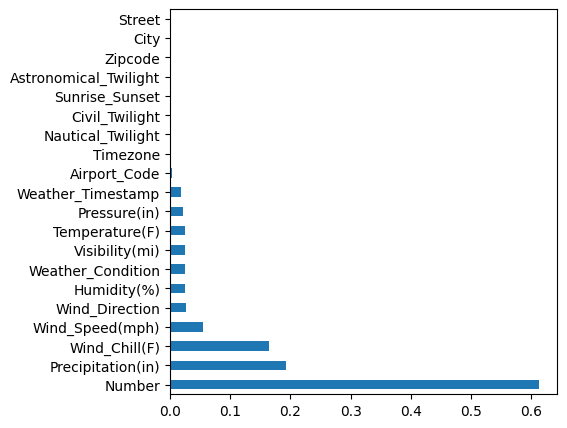

In [12]:
missing_percentage[missing_percentage !=0].plot(kind = 'barh', figsize =(5,5))

In [13]:
cities = df.City.unique()
len(cities)

11682

###  Which 5 states have the highest number of accidents?

In [14]:
states_by_accident = df['State'].value_counts()[:10]

<Axes: >

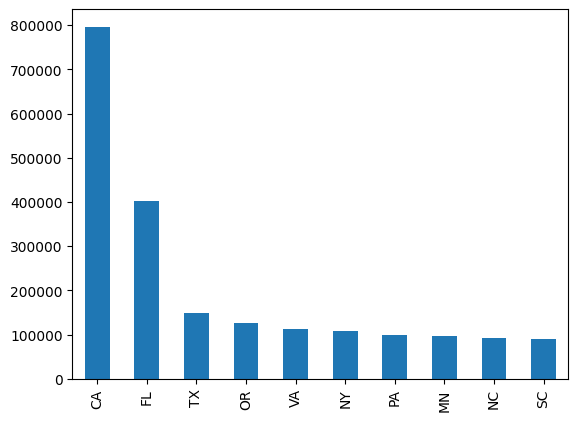

In [15]:
states_by_accident.plot(kind = 'bar')

### Top cities in number of accidents

In [16]:
cities_by_accident = df.City.value_counts()
cities_by_accident[:30]

Miami             106966
Los Angeles        68956
Orlando            54691
Dallas             41979
Houston            39448
Charlotte          33152
Sacramento         32559
San Diego          26627
Raleigh            22840
Minneapolis        22768
Portland           20944
Nashville          20267
Austin             18301
Baton Rouge        18182
Phoenix            17143
Saint Paul         16869
New Orleans        16251
Atlanta            15622
Jacksonville       14967
Richmond           14349
Tucson             13799
San Jose           13377
Riverside          13310
Kansas City        13298
Bakersfield        12044
San Bernardino     11249
Chicago            11188
Tampa              10984
Salt Lake City     10709
Ontario            10538
Name: City, dtype: int64

### Time of the day are accidents most frequent in ?

In [17]:
df.Start_Time[0]

'2016-02-08 00:37:08'

In [18]:
df.Start_Time = pd.to_datetime(df.Start_Time)

In [19]:
# convert Datetime to hour

pd.DatetimeIndex(df['Start_Time']).hour

Int64Index([ 0,  5,  6,  6,  7,  8,  8, 11, 14, 15,
            ...
            17, 17, 17, 17, 18, 18, 19, 19, 19, 18],
           dtype='int64', name='Start_Time', length=2845342)

/tmp/ipykernel_156782/3568064872.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pd.DatetimeIndex(df['Start_Time']).hour, bins = 24, kde = False, norm_hist= True)


<Axes: xlabel='Start_Time'>

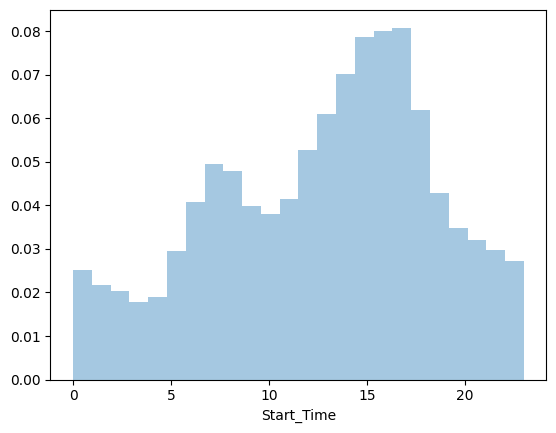

In [20]:
# Plot Histogram

sns.distplot(pd.DatetimeIndex(df['Start_Time']).hour, bins = 24, kde = False, norm_hist= True)

## time of the day highest accidents occur

<Axes: xlabel='Start_Time', ylabel='Count'>

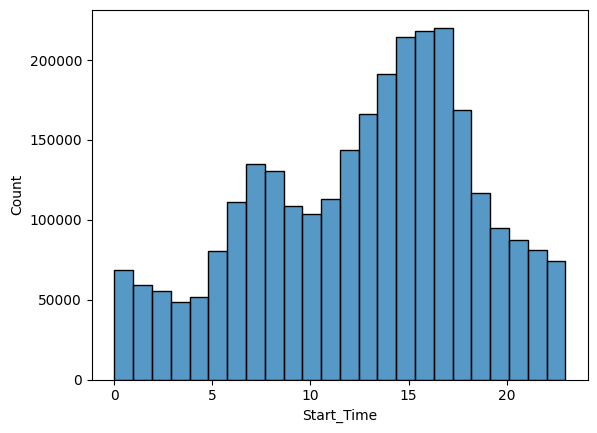

In [21]:
sns.histplot(data = df, x = pd.DatetimeIndex(df['Start_Time']).hour, bins = 24)

## Is the distribution of accidents by hour the same on weekends as on weekdays?

/tmp/ipykernel_156782/3301054707.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.dayofweek, bins = 7, kde = False, norm_hist= True)


<Axes: xlabel='Start_Time'>

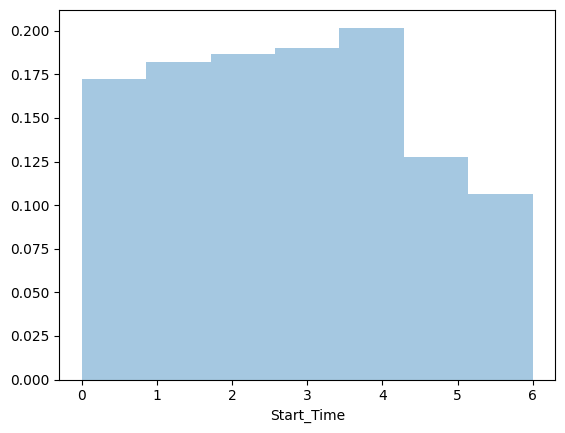

In [22]:
sns.distplot(df.Start_Time.dt.dayofweek, bins = 7, kde = False, norm_hist= True)

In [23]:
cities_by_accident[cities_by_accident == 1]

Carney                          1
Waverly Hall                    1
Center Sandwich                 1
Glen Flora                      1
Sulphur Springs                 1
                               ..
Ridgedale                       1
Sekiu                           1
Wooldridge                      1
Bullock                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1110, dtype: int64

## 4) Which days of the week have the most accidents ?

In [24]:
list_days_of_the_week = []
for i in range(0,7):
    list_days_of_the_week.append(len(df.Start_Time[df.Start_Time.dt.dayofweek == (i)].unique()))
list_days_of_the_week

[268929, 280241, 286551, 291495, 307609, 198976, 173510]

In [25]:
days = ["Monday","Tuesday","Wednesday","Thusday","Friday","Saturday","Sunday"]
days

['Monday', 'Tuesday', 'Wednesday', 'Thusday', 'Friday', 'Saturday', 'Sunday']

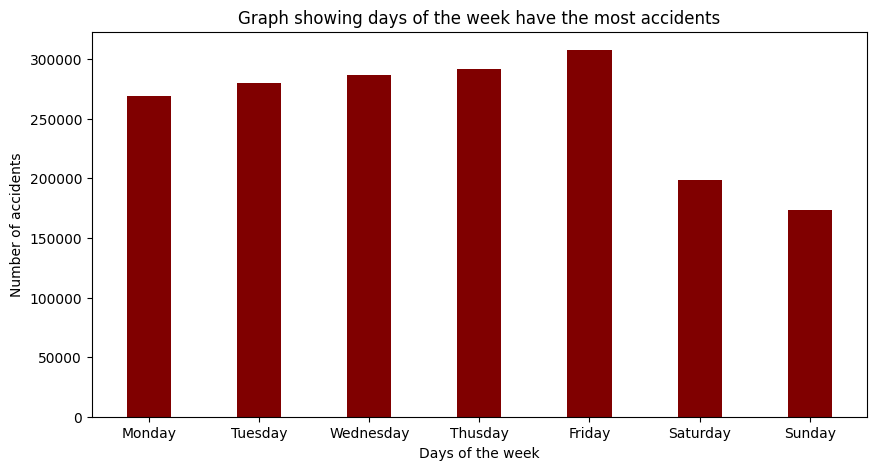

In [26]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(days,list_days_of_the_week, color ='maroon',width = 0.4)
 
plt.xlabel("Days of the week")
plt.ylabel("Number of accidents")
plt.title("Graph showing days of the week have the most accidents")
plt.show()

## 5) Which months have the most accidents?

In [27]:
df.Start_Time.dt.month.value_counts().plot(kind = "bar")

<Axes: >

### 6) What is the trend of accidents year over year (decreasing/increasing) ?

In [28]:
trend_of_accident = df.Start_Time.dt.year.value_counts()
trend_of_accident.plot(kind= "bar")

<Axes: >

In [29]:
df.Start_Time.dt.year.value_counts()

2021    1511745
2020     625864
2019     258615
2017     163918
2018     163176
2016     122024
Name: Start_Time, dtype: int64

## Accidents occur in the year 2019

/tmp/ipykernel_156782/1157442321.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2019.Start_Time.dt.month, bins = 12, kde = False, norm_hist = True)


<Axes: xlabel='Start_Time'>

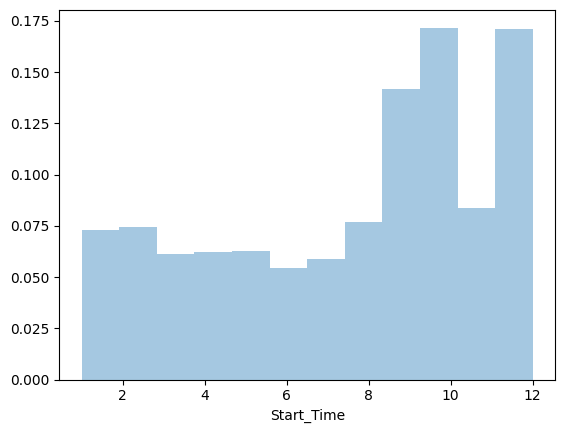

In [30]:
# Data of 2019

df_2019 = df[df.Start_Time.dt.year == 2019]
sns.distplot(df_2019.Start_Time.dt.month, bins = 12, kde = False, norm_hist = True)

## Accidents occur in the year 2018

/tmp/ipykernel_156782/1280808182.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2018.Start_Time.dt.month, bins = 12, kde = False, norm_hist = True)


<Axes: xlabel='Start_Time'>

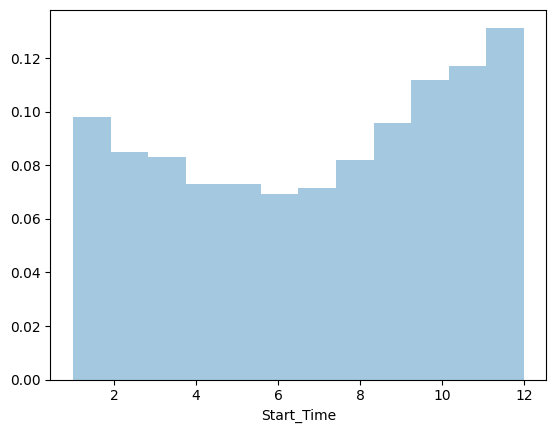

In [31]:
# Data of 2018

df_2018 = df[df.Start_Time.dt.year == 2018]
sns.distplot(df_2018.Start_Time.dt.month, bins = 12, kde = False, norm_hist = True)

## Accidents occur in the year 2016

/tmp/ipykernel_156782/3873253379.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2016.Start_Time.dt.month, bins = 12, kde = False, norm_hist = True)


<Axes: xlabel='Start_Time'>

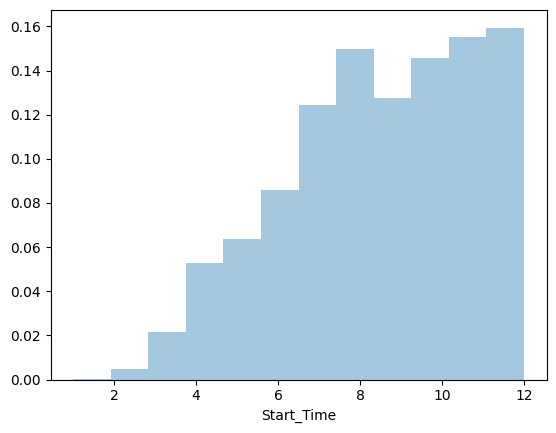

In [32]:
# Data of 2016

df_2016 = df[df.Start_Time.dt.year == 2016]
sns.distplot(df_2016.Start_Time.dt.month, bins = 12, kde = False, norm_hist = True)

### High Accident Cities and low accident cities

In [33]:
high_accident_cities = cities_by_accident[cities_by_accident >= 1000]
low_accident_cities = cities_by_accident[cities_by_accident < 1000]

In [34]:
len(high_accident_cities)

496

/tmp/ipykernel_156782/2843252471.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(high_accident_cities)


<Axes: xlabel='City', ylabel='Density'>

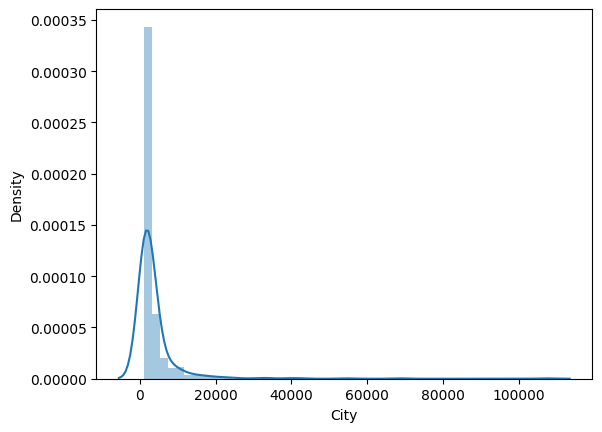

In [35]:
sns.distplot(high_accident_cities)

In [36]:
sns.histplot(cities_by_accident, log_scale = True)

<Axes: xlabel='City', ylabel='Count'>

## Analysis basis on Start Latitude & Longitude

In [37]:
df.Start_Lat[:5]

0    40.108910
1    39.865420
2    39.102660
3    41.062130
4    39.172393
Name: Start_Lat, dtype: float64

In [38]:
df.Start_Lng[:5]

0   -83.092860
1   -84.062800
2   -84.524680
3   -81.537840
4   -84.492792
Name: Start_Lng, dtype: float64

## Scatterplot using Start_Lng and Start_Lat columns
- By using scatterplot we can see the area in the country where accident occurs

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

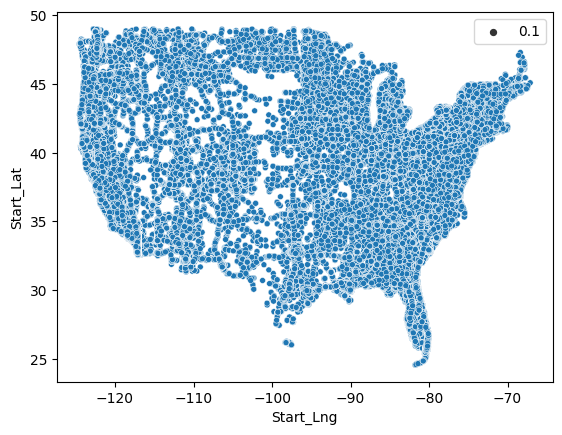

In [39]:
sns.scatterplot(x = df.Start_Lng, y=df.Start_Lat, size = 0.1)

#### Data is very big so we have take 0.1% sample of whole dataset

In [40]:
# Take sample of the dataset and plot it

sample_df = df.sample(int(0.1 * len(df)))

sns.scatterplot(x = sample_df.Start_Lng, y = sample_df.Start_Lat, size = 0.001)

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

### Heatmap of correlation

/tmp/ipykernel_156782/58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

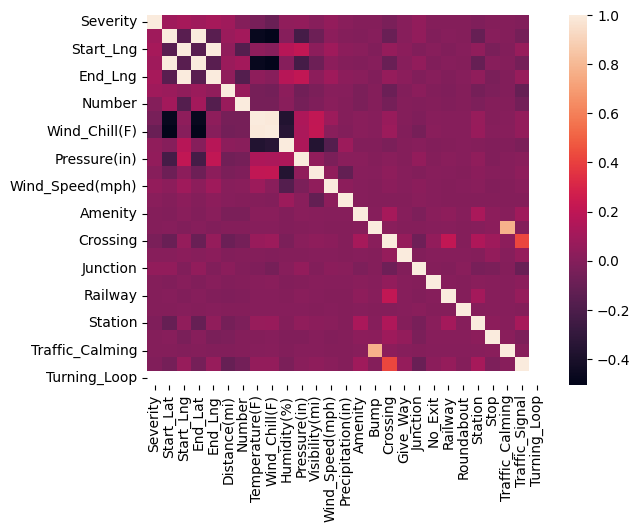

In [41]:
sns.heatmap(df.corr())

### Apply Machine Learning

In [42]:
df = df[['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'State', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Sunrise_Sunset']]

In [43]:
df.shape

(2845342, 17)

In [44]:
df = df.dropna(subset=['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'State', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Sunrise_Sunset'])


In [45]:
df.head()

ID  Severity          Start_Time             End_Time  Start_Lat  \
0    A-1         3 2016-02-08 00:37:08  2016-02-08 06:37:08  40.108910   
4    A-5         3 2016-02-08 07:53:43  2016-02-08 13:53:43  39.172393   
7    A-8         2 2016-02-08 11:51:46  2016-02-08 17:51:46  41.375310   
9   A-10         2 2016-02-08 15:16:43  2016-02-08 21:16:43  40.109310   
10  A-11         2 2016-02-08 15:43:50  2016-02-08 21:43:50  39.192880   

    Start_Lng State  Temperature(F)  Wind_Chill(F)  Humidity(%)  Pressure(in)  \
0  -83.092860    OH            42.1           36.1         58.0         29.76   
4  -84.492792    OH            37.0           29.8         93.0         29.69   
7  -81.820170    OH            33.1           30.0         92.0         29.63   
9  -82.968490    OH            32.0           28.7        100.0         29.59   
10 -84.477230    OH            33.8           29.6        100.0         29.66   

    Visibility(mi) Wind_Direction  Wind_Speed(mph)  Precipitation(in)  \
0             10.0             SW             10.4               0.00   
4             10.0            WSW             10.4               0.01   
7              0.5             SW              3.5               0.08   
9              0.5           West              3.5               0.05   
10             3.0            NNW              4.6               0.03   

   Weather_Condition Sunrise_Sunset  
0         Light Rain          Night  
4         Light Rain            Day  
7               Snow            Day  
9               Snow            Day  
10        Light Snow            Day

In [46]:
df.shape

(2207326, 17)

In [47]:
df.loc[df['Severity']<= 2, 'Severity_Map'] = '0'
df.loc[df['Severity']> 2, 'Severity_Map'] = '1'


In [48]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])

df['Start_Time_Hour'] = df['Start_Time'].dt.hour.map("{:2}".format).astype(int)
#df = df.drop('Start_Time', axis=1)  # Drop original 'Start_Time' column

# Convert 'Start_Time_Hour' to categorical dtype
df['Start_Time_Segment'] = pd.Categorical(
    df['Start_Time_Hour'].apply(lambda x: 
        '0H-6H' if x < 6 else
        '6H-12H' if x < 12 else
        '12H-18H' if x < 18 else
        '18H-24H'),
    categories=['0H-6H', '6H-12H', '12H-18H', '18H-24H'],
    ordered=True
)

In [49]:
df['End_Time_Hour'] = df['End_Time'].dt.hour.map("{:2}".format).astype(int)
#df = df.drop('End_Time', axis=1)  # Drop original 'Start_Time' column

# Convert 'Start_Time_Hour' to categorical dtype
df['End_Time_Segment'] = pd.Categorical(
    df['End_Time_Hour'].apply(lambda x: 
        '0H-6H' if x < 6 else
        '6H-12H' if x < 12 else
        '12H-18H' if x < 18 else
        '18H-24H'),
    categories=['0H-6H', '6H-12H', '12H-18H', '18H-24H'],
    ordered=True
)

In [50]:
df.shape

(2207326, 22)

In [51]:
pd.set_option("display.max_columns", None)
df.head()

ID  Severity          Start_Time            End_Time  Start_Lat  \
0    A-1         3 2016-02-08 00:37:08 2016-02-08 06:37:08  40.108910   
4    A-5         3 2016-02-08 07:53:43 2016-02-08 13:53:43  39.172393   
7    A-8         2 2016-02-08 11:51:46 2016-02-08 17:51:46  41.375310   
9   A-10         2 2016-02-08 15:16:43 2016-02-08 21:16:43  40.109310   
10  A-11         2 2016-02-08 15:43:50 2016-02-08 21:43:50  39.192880   

    Start_Lng State  Temperature(F)  Wind_Chill(F)  Humidity(%)  Pressure(in)  \
0  -83.092860    OH            42.1           36.1         58.0         29.76   
4  -84.492792    OH            37.0           29.8         93.0         29.69   
7  -81.820170    OH            33.1           30.0         92.0         29.63   
9  -82.968490    OH            32.0           28.7        100.0         29.59   
10 -84.477230    OH            33.8           29.6        100.0         29.66   

    Visibility(mi) Wind_Direction  Wind_Speed(mph)  Precipitation(in)  \
0             10.0             SW             10.4               0.00   
4             10.0            WSW             10.4               0.01   
7              0.5             SW              3.5               0.08   
9              0.5           West              3.5               0.05   
10             3.0            NNW              4.6               0.03   

   Weather_Condition Sunrise_Sunset Severity_Map  Start_Time_Hour  \
0         Light Rain          Night            1                0   
4         Light Rain            Day            1                7   
7               Snow            Day            0               11   
9               Snow            Day            0               15   
10        Light Snow            Day            0               15   

   Start_Time_Segment  End_Time_Hour End_Time_Segment  
0               0H-6H              6           6H-12H  
4              6H-12H             13          12H-18H  
7              6H-12H             17          12H-18H  
9             12H-18H             21          18H-24H  
10            12H-18H             21          18H-24H

In [73]:
le = preprocessing.LabelEncoder()

df['State-en'] = le.fit_transform(df['State'])
State_en = dict(zip(le.classes_, le.transform(le.classes_)))
print(State_en)

df['Wind_Direction_en']=le.fit_transform(df['Wind_Direction'])
Wind_Direction_en = dict(zip(le.classes_, le.transform(le.classes_)))

df['Weather_Condition_en']=le.fit_transform(df['Weather_Condition'])
Weather_Condition_en = dict(zip(le.classes_, le.transform(le.classes_)))

df['Sunrise_Sunset_en']=le.fit_transform(df['Sunrise_Sunset'])
Sunrise_Sunset_en = dict(zip(le.classes_, le.transform(le.classes_)))

df['Start_Time_Segment_en']=le.fit_transform(df['Start_Time_Segment'])
Start_Time_Segment_en = dict(zip(le.classes_, le.transform(le.classes_)))
print(Start_Time_Segment_en)


df['End_Time_Segment_en']=le.fit_transform(df['End_Time_Segment'])
End_Time_Segment_en = dict(zip(le.classes_, le.transform(le.classes_)))
print(End_Time_Segment_en)

df.head()


{'AL': 0, 'AR': 1, 'AZ': 2, 'CA': 3, 'CO': 4, 'CT': 5, 'DC': 6, 'DE': 7, 'FL': 8, 'GA': 9, 'IA': 10, 'ID': 11, 'IL': 12, 'IN': 13, 'KS': 14, 'KY': 15, 'LA': 16, 'MA': 17, 'MD': 18, 'ME': 19, 'MI': 20, 'MN': 21, 'MO': 22, 'MS': 23, 'MT': 24, 'NC': 25, 'ND': 26, 'NE': 27, 'NH': 28, 'NJ': 29, 'NM': 30, 'NV': 31, 'NY': 32, 'OH': 33, 'OK': 34, 'OR': 35, 'PA': 36, 'RI': 37, 'SC': 38, 'SD': 39, 'TN': 40, 'TX': 41, 'UT': 42, 'VA': 43, 'VT': 44, 'WA': 45, 'WI': 46, 'WV': 47, 'WY': 48}
{'0H-6H': 0, '12H-18H': 1, '18H-24H': 2, '6H-12H': 3}
{'0H-6H': 0, '12H-18H': 1, '18H-24H': 2, '6H-12H': 3}


ID  Severity          Start_Time            End_Time  Start_Lat  \
0    A-1         3 2016-02-08 00:37:08 2016-02-08 06:37:08  40.108910   
4    A-5         3 2016-02-08 07:53:43 2016-02-08 13:53:43  39.172393   
7    A-8         2 2016-02-08 11:51:46 2016-02-08 17:51:46  41.375310   
9   A-10         2 2016-02-08 15:16:43 2016-02-08 21:16:43  40.109310   
10  A-11         2 2016-02-08 15:43:50 2016-02-08 21:43:50  39.192880   

    Start_Lng State  Temperature(F)  Wind_Chill(F)  Humidity(%)  Pressure(in)  \
0  -83.092860    OH            42.1           36.1         58.0         29.76   
4  -84.492792    OH            37.0           29.8         93.0         29.69   
7  -81.820170    OH            33.1           30.0         92.0         29.63   
9  -82.968490    OH            32.0           28.7        100.0         29.59   
10 -84.477230    OH            33.8           29.6        100.0         29.66   

    Visibility(mi) Wind_Direction  Wind_Speed(mph)  Precipitation(in)  \
0             10.0             SW             10.4               0.00   
4             10.0            WSW             10.4               0.01   
7              0.5             SW              3.5               0.08   
9              0.5           West              3.5               0.05   
10             3.0            NNW              4.6               0.03   

   Weather_Condition Sunrise_Sunset Severity_Map  Start_Time_Hour  \
0         Light Rain          Night            1                0   
4         Light Rain            Day            1                7   
7               Snow            Day            0               11   
9               Snow            Day            0               15   
10        Light Snow            Day            0               15   

   Start_Time_Segment  End_Time_Hour End_Time_Segment  State-en  \
0               0H-6H              6           6H-12H        33   
4              6H-12H             13          12H-18H        33   
7              6H-12H             17          12H-18H        33   
9             12H-18H             21          18H-24H        33   
10            12H-18H             21          18H-24H        33   

    Wind_Direction_en  Weather_Condition_en  Sunrise_Sunset_en  \
0                  15                    49                  1   
4                  21                    49                  0   
7                  15                    90                  0   
9                  22                    90                  0   
10                  8                    57                  0   

    Start_Time_Segment_en  End_Time_Segment_en  
0                       0                    3  
4                       3                    1  
7                       3                    1  
9                       1                    2  
10                      1                    2

In [72]:
print(Wind_Direction_en)

{'CALM': 0, 'E': 1, 'ENE': 2, 'ESE': 3, 'East': 4, 'N': 5, 'NE': 6, 'NNE': 7, 'NNW': 8, 'NW': 9, 'North': 10, 'S': 11, 'SE': 12, 'SSE': 13, 'SSW': 14, 'SW': 15, 'South': 16, 'VAR': 17, 'Variable': 18, 'W': 19, 'WNW': 20, 'WSW': 21, 'West': 22}


In [53]:
with open('State_en.pkl', 'wb') as f:
    pickle.dump(State_en, f)
    
with open('Wind_Direction_en.pkl', 'wb') as f:
    pickle.dump(Wind_Direction_en, f)
    
with open('Weather_Condition_en.pkl', 'wb') as f:
    pickle.dump(Weather_Condition_en, f)
    
with open('Sunrise_Sunset_en.pkl', 'wb') as f:
    pickle.dump(Sunrise_Sunset_en, f)
    
with open('Start_Time_Segment_en.pkl', 'wb') as f:
    pickle.dump(Start_Time_Segment_en, f)
    
with open('End_Time_Segment_en.pkl', 'wb') as f:
    pickle.dump(End_Time_Segment_en, f)
    

In [ ]:
"""
le = preprocessing.LabelEncoder()
 
df['State_en'] = le.fit_transform(df['State'])
df['Wind_Direction_en'] = le.fit_transform(df['Wind_Direction'])
df['Weather_Condition_en'] = le.fit_transform(df['Weather_Condition'])
df['Sunrise_Sunset_en'] = le.fit_transform(df['Sunrise_Sunset'])
df['Start_Time_Segment_en'] = le.fit_transform(df['Start_Time_Segment'])
df['End_Time_Segment_en'] = le.fit_transform(df['End_Time_Segment'])
"""

In [54]:
df.shape

(2207326, 28)

In [55]:
df_2019=df[df['Start_Time'].dt.year==2019]

In [56]:
pd.set_option('display.max_columns', None)
df_2019

ID  Severity          Start_Time            End_Time  \
582028    A-582029         4 2019-10-02 12:50:00 2021-07-03 02:57:45   
1295810  A-1295811         4 2019-11-01 16:18:00 2021-03-28 23:55:52   
1568027  A-1568028         4 2019-06-04 16:00:00 2021-04-02 06:59:00   
1756843  A-1756844         4 2019-10-19 04:30:00 2020-11-01 00:00:00   
1935372  A-1935373         4 2019-12-17 09:12:52 2020-10-14 07:07:49   
...            ...       ...                 ...                 ...   
2845337  A-2845338         2 2019-08-23 18:03:25 2019-08-23 18:32:01   
2845338  A-2845339         2 2019-08-23 19:11:30 2019-08-23 19:38:23   
2845339  A-2845340         2 2019-08-23 19:00:21 2019-08-23 19:28:49   
2845340  A-2845341         2 2019-08-23 19:00:21 2019-08-23 19:29:42   
2845341  A-2845342         2 2019-08-23 18:52:06 2019-08-23 19:21:31   

         Start_Lat   Start_Lng State  Temperature(F)  Wind_Chill(F)  \
582028   40.736515  -74.084907    NJ            89.0           89.0   
1295810  29.955075  -90.071696    LA            54.0           54.0   
1568027  29.773556  -95.351304    TX            79.0           79.0   
1756843  38.875540  -77.280396    VA            37.0           37.0   
1935372  33.634089 -112.106196    AZ            47.0           41.0   
...            ...         ...   ...             ...            ...   
2845337  34.002480 -117.379360    CA            86.0           86.0   
2845338  32.766960 -117.148060    CA            70.0           70.0   
2845339  33.775450 -117.847790    CA            73.0           73.0   
2845340  33.992460 -118.403020    CA            71.0           71.0   
2845341  34.133930 -117.230920    CA            79.0           79.0   

         Humidity(%)  Pressure(in)  Visibility(mi) Wind_Direction  \
582028          48.0         29.64            10.0            VAR   
1295810         59.0         30.24            10.0              N   
1568027         77.0         29.88            10.0              S   
1756843         92.0         30.02            10.0           CALM   
1935372         22.0         28.75            10.0            NNE   
...              ...           ...             ...            ...   
2845337         40.0         28.92            10.0              W   
2845338         73.0         29.39            10.0             SW   
2845339         64.0         29.74            10.0            SSW   
2845340         81.0         29.62            10.0             SW   
2845341         47.0         28.63             7.0             SW   

         Wind_Speed(mph)  Precipitation(in)   Weather_Condition  \
582028               5.0                0.0                Fair   
1295810              5.0                0.0       Mostly Cloudy   
1568027             25.0                0.0  Light Rain / Windy   
1756843              0.0                0.0                Fair   
1935372             14.0                0.0                Fair   
...                  ...                ...                 ...   
2845337             13.0                0.0                Fair   
2845338              6.0                0.0                Fair   
2845339             10.0                0.0       Partly Cloudy   
2845340              8.0                0.0                Fair   
2845341              7.0                0.0                Fair   

        Sunrise_Sunset Severity_Map  Start_Time_Hour Start_Time_Segment  \
582028             Day            1               12            12H-18H   
1295810            Day            1               16            12H-18H   
1568027            Day            1               16            12H-18H   
1756843          Night            1                4              0H-6H   
1935372            Day            1                9             6H-12H   
...                ...          ...              ...                ...   
2845337            Day            0               18            18H-24H   
2845338            Day            0               19            

In [57]:
df_2019.shape

(196132, 28)

### Apply Logistic Regression

In [ ]:
x = df_2019[['State_en', 'Start_Lat', 'Start_Lng',  'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction_en', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition_en', 'Sunrise_Sunset_en', 'Start_Time_Segment_en', 'End_Time_Segment_en']].to_numpy()
x = np.expand_dims(x, axis=0)
x.shape

In [ ]:
y = np.array(df_2019['Severity_Map'])
y = np.expand_dims(y, axis=0)
y.shape

In [ ]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x[0], y[0])

In [ ]:
model.predict_proba(x[0])

In [ ]:
y_predict = model.predict_proba(x[0])[:,1]>0.5
y_predict

In [ ]:
df_2019['Severity_Map'] = df_2019['Severity_Map'].astype(y_predict.dtype)


In [ ]:
#calculating precision and recall
precision = precision_score(df_2019['Severity_Map'], y_predict)
recall = recall_score(df_2019['Severity_Map'], y_predict)
 
print('Precision: ',precision)
print('Recall: ',recall)

### Applying Random Forest Classifier 

In [58]:
df_2019.drop(['ID', "Severity", 'Wind_Chill(F)', 'Temperature(F)', 'End_Time_Segment', 'Start_Time_Segment', 'Sunrise_Sunset', 'Weather_Condition', 'Wind_Direction', 'State', 'Start_Time', 'End_Time', 'Start_Time_Hour', 'End_Time_Hour'], axis = 1, inplace = True)
df_2019

/tmp/ipykernel_156782/2434987314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019.drop(['ID', "Severity", 'Wind_Chill(F)', 'Temperature(F)', 'End_Time_Segment', 'Start_Time_Segment', 'Sunrise_Sunset', 'Weather_Condition', 'Wind_Direction', 'State', 'Start_Time', 'End_Time', 'Start_Time_Hour', 'End_Time_Hour'], axis = 1, inplace = True)


Start_Lat   Start_Lng  Humidity(%)  Pressure(in)  Visibility(mi)  \
582028   40.736515  -74.084907         48.0         29.64            10.0   
1295810  29.955075  -90.071696         59.0         30.24            10.0   
1568027  29.773556  -95.351304         77.0         29.88            10.0   
1756843  38.875540  -77.280396         92.0         30.02            10.0   
1935372  33.634089 -112.106196         22.0         28.75            10.0   
...            ...         ...          ...           ...             ...   
2845337  34.002480 -117.379360         40.0         28.92            10.0   
2845338  32.766960 -117.148060         73.0         29.39            10.0   
2845339  33.775450 -117.847790         64.0         29.74            10.0   
2845340  33.992460 -118.403020         81.0         29.62            10.0   
2845341  34.133930 -117.230920         47.0         28.63             7.0   

         Wind_Speed(mph)  Precipitation(in) Severity_Map  State-en  \
582028               5.0                0.0            1        29   
1295810              5.0                0.0            1        16   
1568027             25.0                0.0            1        41   
1756843              0.0                0.0            1        43   
1935372             14.0                0.0            1         2   
...                  ...                ...          ...       ...   
2845337             13.0                0.0            0         3   
2845338              6.0                0.0            0         3   
2845339             10.0                0.0            0         3   
2845340              8.0                0.0            0         3   
2845341              7.0                0.0            0         3   

         Wind_Direction_en  Weather_Condition_en  Sunrise_Sunset_en  \
582028                  17                    13                  0   
1295810                  5                    66                  0   
1568027                 11                    50                  0   
1756843                  0                    13                  1   
1935372                  7                    13                  0   
...                    ...                   ...                ...   
2845337                 19                    13                  0   
2845338                 15                    13                  0   
2845339                 14                    71                  0   
2845340                 15                    13                  0   
2845341                 15                    13                  0   

         Start_Time_Segment_en  End_Time_Segment_en  
582028                       1                    0  
1295810                      1                    2  
1568027                      1                    3  
1756843                      0                    0  
1935372                      3                    3  
...                        ...                  ...  
2845337                      2                    2  
2845338                      2                    2  
2845339                      2                    2  
2845340                      2                    2  
2845341                      2                    2  

[196132 rows x 14 columns]

In [59]:
df_2019.shape

(196132, 14)

In [60]:
min_values = df_2019.min().tolist()
max_values = df_2019.max().tolist()

In [61]:
with open('min_max_lists.pkl', 'wb') as f:
    pickle.dump(min_values, f)
    pickle.dump(max_values, f)

In [62]:
# scale all features by using MinMaxScaler for all features
# Select the columns to be scaled
#cols_to_scale = ['Start_Lat', 'Severity', 'Start_Lng', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Severity_Map']
scaler = MinMaxScaler()
#scaler.fit(df_2019)
#scaler.fit(df_2019[cols_to_scale])
#df_2019[cols_to_scale] = scaler.transform(df_2019[cols_to_scale])
df_2019 = pd.DataFrame(scaler.fit_transform(df_2019), columns=df_2019.columns)




In [63]:
df_2019.head()

Start_Lat  Start_Lng  Humidity(%)  Pressure(in)  Visibility(mi)  \
0   0.661727   0.887638     0.474747      0.874355        0.111111   
1   0.220292   0.606151     0.585859      0.925990        0.111111   
2   0.212860   0.513191     0.767677      0.895009        0.111111   
3   0.585531   0.831373     0.919192      0.907057        0.111111   
4   0.370926   0.218180     0.212121      0.797762        0.111111   

   Wind_Speed(mph)  Precipitation(in)  Severity_Map  State-en  \
0         0.029586                0.0           1.0  0.604167   
1         0.029586                0.0           1.0  0.333333   
2         0.147929                0.0           1.0  0.854167   
3         0.000000                0.0           1.0  0.895833   
4         0.082840                0.0           1.0  0.041667   

   Wind_Direction_en  Weather_Condition_en  Sunrise_Sunset_en  \
0           0.772727              0.115044                0.0   
1           0.227273              0.584071                0.0   
2           0.500000              0.442478                0.0   
3           0.000000              0.115044                1.0   
4           0.318182              0.115044                0.0   

   Start_Time_Segment_en  End_Time_Segment_en  
0               0.333333             0.000000  
1               0.333333             0.666667  
2               0.333333             1.000000  
3               0.000000             0.000000  
4               1.000000             1.000000

In [64]:
labels = df_2019.pop('Severity_Map')

In [65]:
df_2019.shape

(196132, 13)

In [66]:
x_train, x_test, y_train, y_test = train_test_split(df_2019, labels, test_size = 0.25)

In [67]:
classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)

RandomForestClassifier()

In [68]:
pickle.dump(classifier, open('model.pkl', 'wb'))

In [69]:
y_pred = classifier.predict(x_test)

In [70]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7943323291375649

In [71]:
#calculating precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
 
print('Precision: ',precision)
print('Recall: ',recall)

Precision:  0.7567809621289662
Recall:  0.636500591843323
